In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from gabor_fit import fit
import theano

In [2]:
gf = fit.GaborFit()

/Users/jesse/Development/Theano/theano/gof/cc.py:944: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()


In [3]:
# x, y, theta, phi, lkx, lvx, lvy
params = np.array([8., 8., np.pi/2., 0., 2.*np.pi/2.8284271247461903 / 2., 2., 2.])

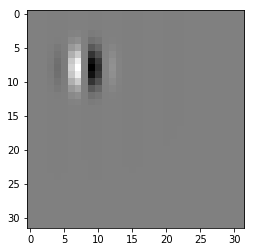

In [4]:
gs = gf.make_gabor(params, 32, 32)
plt.imshow(np.squeeze(gs), cmap='gray')

lkx = 2 pi / lambda

In [5]:
_, pp, se = gf.fit(gs)

In [6]:
pp = fit.combine_params(*pp)
print(pp)

[  8.00001621e+00   8.00000572e+00   1.57079637e+00  -8.10687197e-06
   1.10459304e+00   2.00355959e+00   1.99998367e+00]


In [7]:
print(params)

[ 8.          8.          1.57079633  0.          1.11072073  2.          2.        ]


In [8]:
se

array([  1.82008121e-05])

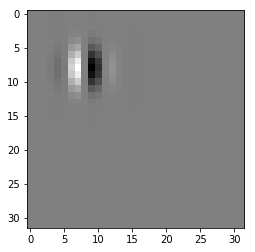

In [9]:
gs = gf.make_gabor(pp, 32, 32)
plt.imshow(np.squeeze(gs), cmap='gray')